In [22]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Ensure GPU is available and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 15

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "trainingData",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "testingData",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "validationData",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

class_names = train_dataset.class_names


# Cache, Shuffle, and Prefetch the Dataset
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Simplified preprocessing layer
with tf.device('/CPU:0'):
    resize_and_rescale = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1./255),
    ])

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define the model
with tf.device('/GPU:0'):
    model = models.Sequential([
        resize_and_rescale,
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
    ])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')


TensorFlow version: 2.7.0
Physical devices cannot be modified after being initialized
Found 613 files belonging to 4 classes.
Found 315 files belonging to 4 classes.
Found 72 files belonging to 4 classes.
Epoch 1/15


2024-06-17 13:34:20.233869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 2/20 [==>...........................] - ETA: 4s - loss: 1.3780 - accuracy: 0.2188 

 3/20 [===>..........................] - ETA: 3s - loss: 1.3588 - accuracy: 0.3021

 5/20 [======>.......................] - ETA: 3s - loss: 1.3807 - accuracy: 0.2688

 7/20 [=========>....................] - ETA: 2s - loss: 1.3776 - accuracy: 0.2487

 8/20 [===========>..................] - ETA: 2s - loss: 1.3693 - accuracy: 0.2533

 9/20 [============>.................] - ETA: 2s - loss: 1.3668 - accuracy: 0.2759

c): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"


11/20 [===============>..............] - ETA: 1s - loss: 1.3599 - accuracy: 0.2831

12/20 [=================>............] - ETA: 1s - loss: 1.3534 - accuracy: 0.2913

13/20 [==================>...........] - ETA: 1s - loss: 1.3552 - accuracy: 0.2931

15/20 [=====================>........] - ETA: 1s - loss: 1.3616 - accuracy: 0.2892

16/20 [=======================>......] - ETA: 0s - loss: 1.3657 - accuracy: 0.2845

17/20 [========================>.....] - ETA: 0s - loss: 1.3630 - accuracy: 0.2901

("(mpsFileLoc): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"

18/20 [==========================>...] - ETA: 0s - loss: 1.3595 - accuracy: 0.3042

("(mpsFileLoc): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"


20/20 [==============================] - ETA: 0s - loss: 1.3584 - accuracy: 0.2985

2024-06-17 13:34:25.686214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 8s 329ms/step - loss: 1.3584 - accuracy: 0.2985 - val_loss: 1.3359 - val_accuracy: 0.2286


Epoch 2/15
 2/20 [==>...........................] - ETA: 3s - loss: 1.3002 - accuracy: 0.2812

 3/20 [===>..........................] - ETA: 3s - loss: 1.3276 - accuracy: 0.2604

 4/20 [=====>........................] - ETA: 3s - loss: 1.3197 - accuracy: 0.2422

 5/20 [======>.......................] - ETA: 3s - loss: 1.2935 - accuracy: 0.2562

 7/20 [=========>....................] - ETA: 2s - loss: 1.2942 - accuracy: 0.2455

 8/20 [===========>..................] - ETA: 2s - loss: 1.2688 - accuracy: 0.2852

 9/20 [============>.................] - ETA: 2s - loss: 1.2591 - accuracy: 0.3090

10/20 [==============>...............] - ETA: 2s - loss: 1.2556 - accuracy: 0.3063

11/20 [===============>..............] - ETA: 1s - loss: 1.2619 - accuracy: 0.3097

12/20 [=================>............] - ETA: 1s - loss: 1.2615 - accuracy: 0.3151

("(mpsFileLoc): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"


13/20 [==================>...........] - ETA: 1s - loss: 1.2587 - accuracy: 0.3221

14/20 [====================>.........] - ETA: 1s - loss: 1.2419 - accuracy: 0.3438

15/20 [=====================>........] - ETA: 1s - loss: 1.2356 - accuracy: 0.3417

17/20 [========================>.....] - ETA: 0s - loss: 1.2338 - accuracy: 0.3401

19/20 [===========================>..] - ETA: 0s - loss: 1.2354 - accuracy: 0.3477

20/20 [==============================] - ETA: 0s - loss: 1.2197 - accuracy: 0.3573

20/20 [==============================] - 5s 249ms/step - loss: 1.2197 - accuracy: 0.3573 - val_loss: 2.1581 - val_accuracy: 0.1905


Epoch 3/15
 2/20 [==>...........................] - ETA: 3s - loss: 1.2485 - accuracy: 0.4219

 4/20 [=====>........................] - ETA: 3s - loss: 1.2416 - accuracy: 0.4375

 5/20 [======>.......................] - ETA: 3s - loss: 1.2496 - accuracy: 0.4250

 6/20 [========>.....................] - ETA: 2s - loss: 1.2699 - accuracy: 0.4115

 8/20 [===========>..................] - ETA: 2s - loss: 1.3054 - accuracy: 0.3828

10/20 [==============>...............] - ETA: 1s - loss: 1.3124 - accuracy: 0.3823

12/20 [=================>............] - ETA: 1s - loss: 1.3054 - accuracy: 0.4034

13/20 [==================>...........] - ETA: 1s - loss: 1.3068 - accuracy: 0.4010

15/20 [=====================>........] - ETA: 0s - loss: 1.2992 - accuracy: 0.3996

17/20 [========================>.....] - ETA: 0s - loss: 1.2782 - accuracy: 0.4004

19/20 [===========================>..] - ETA: 0s - loss: 1.2722 - accuracy: 0.4062

20/20 [==============================] - ETA: 0s - loss: 1.2610 - accuracy: 0.4078

20/20 [==============================] - 5s 243ms/step - loss: 1.2610 - accuracy: 0.4078 - val_loss: 1.3527 - val_accuracy: 0.1841
Epoch 4/15
 1/20 [>.............................] - ETA: 3s - loss: 1.1815 - accuracy: 0.3438

 3/20 [===>..........................] - ETA: 3s - loss: 1.1080 - accuracy: 0.4479

 5/20 [======>.......................] - ETA: 2s - loss: 1.0935 - accuracy: 0.4688

 7/20 [=========>....................] - ETA: 2s - loss: 1.1190 - accuracy: 0.4866

 8/20 [===========>..................] - ETA: 2s - loss: 1.1180 - accuracy: 0.5039

 9/20 [============>.................] - ETA: 2s - loss: 1.1099 - accuracy: 0.5069

11/20 [===============>..............] - ETA: 1s - loss: 1.1260 - accuracy: 0.4972

13/20 [==================>...........] - ETA: 1s - loss: 1.1125 - accuracy: 0.5192

15/20 [=====================>........] - ETA: 0s - loss: 1.1165 - accuracy: 0.5232

17/20 [========================>.....] - ETA: 0s - loss: 1.1018 - accuracy: 0.5261

19/20 [===========================>..] - ETA: 0s - loss: 1.0986 - accuracy: 0.5284

20/20 [==============================] - ETA: 0s - loss: 1.0906 - accuracy: 0.5253

20/20 [==============================] - 5s 238ms/step - loss: 1.0906 - accuracy: 0.5253 - val_loss: 1.0089 - val_accuracy: 0.4857


Epoch 5/15
 2/20 [==>...........................] - ETA: 3s - loss: 0.9257 - accuracy: 0.5156

 4/20 [=====>........................] - ETA: 3s - loss: 1.0427 - accuracy: 0.5312

 6/20 [========>.....................] - ETA: 2s - loss: 0.9902 - accuracy: 0.5625

 8/20 [===========>..................] - ETA: 2s - loss: 0.9898 - accuracy: 0.5459

10/20 [==============>...............] - ETA: 1s - loss: 0.9856 - accuracy: 0.5461

11/20 [===============>..............] - ETA: 1s - loss: 0.9823 - accuracy: 0.5477

13/20 [==================>...........] - ETA: 1s - loss: 1.0003 - accuracy: 0.5424

15/20 [=====================>........] - ETA: 0s - loss: 0.9885 - accuracy: 0.5519

17/20 [========================>.....] - ETA: 0s - loss: 0.9701 - accuracy: 0.5532

19/20 [===========================>..] - ETA: 0s - loss: 0.9650 - accuracy: 0.5611

20/20 [==============================] - ETA: 0s - loss: 0.9495 - accuracy: 0.5726

20/20 [==============================] - 5s 237ms/step - loss: 0.9495 - accuracy: 0.5726 - val_loss: 1.0829 - val_accuracy: 0.5143
Epoch 6/15
 1/20 [>.............................] - ETA: 3s - loss: 0.8441 - accuracy: 0.7812

 3/20 [===>..........................] - ETA: 3s - loss: 0.8917 - accuracy: 0.6458

 5/20 [======>.......................] - ETA: 2s - loss: 0.8281 - accuracy: 0.6687

 7/20 [=========>....................] - ETA: 2s - loss: 0.7997 - accuracy: 0.6295

 9/20 [============>.................] - ETA: 2s - loss: 0.8122 - accuracy: 0.6493

11/20 [===============>..............] - ETA: 1s - loss: 0.7927 - accuracy: 0.6562

12/20 [=================>............] - ETA: 1s - loss: 0.7847 - accuracy: 0.6615

14/20 [====================>.........] - ETA: 1s - loss: 0.7885 - accuracy: 0.6540

16/20 [=======================>......] - ETA: 0s - loss: 0.7808 - accuracy: 0.6602

18/20 [==========================>...] - ETA: 0s - loss: 0.7844 - accuracy: 0.6612

20/20 [==============================] - ETA: 0s - loss: 0.7731 - accuracy: 0.6656

20/20 [==============================] - 5s 238ms/step - loss: 0.7731 - accuracy: 0.6656 - val_loss: 0.9942 - val_accuracy: 0.5143


Epoch 7/15
 2/20 [==>...........................] - ETA: 3s - loss: 0.6129 - accuracy: 0.8125

 4/20 [=====>........................] - ETA: 2s - loss: 0.6524 - accuracy: 0.7624

 6/20 [========>.....................] - ETA: 2s - loss: 0.6211 - accuracy: 0.7758

 8/20 [===========>..................] - ETA: 2s - loss: 0.5876 - accuracy: 0.7860

10/20 [==============>...............] - ETA: 1s - loss: 0.5801 - accuracy: 0.7884

12/20 [=================>............] - ETA: 1s - loss: 0.6187 - accuracy: 0.7703

14/20 [====================>.........] - ETA: 1s - loss: 0.5869 - accuracy: 0.7815

15/20 [=====================>........] - ETA: 0s - loss: 0.6004 - accuracy: 0.7704

16/20 [=======================>......] - ETA: 0s - loss: 0.6083 - accuracy: 0.7670

17/20 [========================>.....] - ETA: 0s - loss: 0.6072 - accuracy: 0.7698

19/20 [===========================>..] - ETA: 0s - loss: 0.6123 - accuracy: 0.7590

20/20 [==============================] - ETA: 0s - loss: 0.6140 - accuracy: 0.7618

20/20 [==============================] - 5s 240ms/step - loss: 0.6140 - accuracy: 0.7618 - val_loss: 1.4342 - val_accuracy: 0.5302
Epoch 8/15
 1/20 [>.............................] - ETA: 3s - loss: 0.5330 - accuracy: 0.8438

 3/20 [===>..........................] - ETA: 3s - loss: 0.5594 - accuracy: 0.7812

 4/20 [=====>........................] - ETA: 3s - loss: 0.5829 - accuracy: 0.7734

 5/20 [======>.......................] - ETA: 2s - loss: 0.6067 - accuracy: 0.7563

 7/20 [=========>....................] - ETA: 2s - loss: 0.5850 - accuracy: 0.7589

 9/20 [============>.................] - ETA: 2s - loss: 0.5845 - accuracy: 0.7674

11/20 [===============>..............] - ETA: 1s - loss: 0.5730 - accuracy: 0.7754

13/20 [==================>...........] - ETA: 1s - loss: 0.5844 - accuracy: 0.7763

14/20 [====================>.........] - ETA: 1s - loss: 0.5877 - accuracy: 0.7720

15/20 [=====================>........] - ETA: 0s - loss: 0.5768 - accuracy: 0.7770

16/20 [=======================>......] - ETA: 0s - loss: 0.5805 - accuracy: 0.7794

17/20 [========================>.....] - ETA: 0s - loss: 0.5751 - accuracy: 0.7814

19/20 [===========================>..] - ETA: 0s - loss: 0.5879 - accuracy: 0.7694

20/20 [==============================] - ETA: 0s - loss: 0.5929 - accuracy: 0.7684

20/20 [==============================] - 5s 245ms/step - loss: 0.5929 - accuracy: 0.7684 - val_loss: 1.0537 - val_accuracy: 0.5206


Epoch 9/15
 2/20 [==>...........................] - ETA: 3s - loss: 0.5160 - accuracy: 0.7656

 4/20 [=====>........................] - ETA: 3s - loss: 0.5245 - accuracy: 0.7891

 6/20 [========>.....................] - ETA: 2s - loss: 0.4986 - accuracy: 0.7969

 8/20 [===========>..................] - ETA: 2s - loss: 0.5094 - accuracy: 0.7991

10/20 [==============>...............] - ETA: 1s - loss: 0.4761 - accuracy: 0.8089

12/20 [=================>............] - ETA: 1s - loss: 0.4594 - accuracy: 0.8123

14/20 [====================>.........] - ETA: 1s - loss: 0.4513 - accuracy: 0.8147

16/20 [=======================>......] - ETA: 0s - loss: 0.4500 - accuracy: 0.8082

18/20 [==========================>...] - ETA: 0s - loss: 0.4396 - accuracy: 0.8160

20/20 [==============================] - ETA: 0s - loss: 0.4312 - accuracy: 0.8206

20/20 [==============================] - 5s 239ms/step - loss: 0.4312 - accuracy: 0.8206 - val_loss: 1.5091 - val_accuracy: 0.5810
Epoch 10/15
 1/20 [>.............................] - ETA: 3s - loss: 0.3209 - accuracy: 0.9062

 2/20 [==>...........................] - ETA: 3s - loss: 0.3179 - accuracy: 0.9062

 3/20 [===>..........................] - ETA: 3s - loss: 0.3275 - accuracy: 0.8750

("(mpsFileLoc): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"


 5/20 [======>.......................] - ETA: 2s - loss: 0.3459 - accuracy: 0.8562

 7/20 [=========>....................] - ETA: 2s - loss: 0.3342 - accuracy: 0.8750

 9/20 [============>.................] - ETA: 2s - loss: 0.3375 - accuracy: 0.8646

11/20 [===============>..............] - ETA: 1s - loss: 0.3325 - accuracy: 0.8615

13/20 [==================>...........] - ETA: 1s - loss: 0.3091 - accuracy: 0.8740

15/20 [=====================>........] - ETA: 0s - loss: 0.3107 - accuracy: 0.8764

17/20 [========================>.....] - ETA: 0s - loss: 0.3170 - accuracy: 0.8704

18/20 [==========================>...] - ETA: 0s - loss: 0.3195 - accuracy: 0.8707

19/20 [===========================>..] - ETA: 0s - loss: 0.3114 - accuracy: 0.8744

20/20 [==============================] - ETA: 0s - loss: 0.3189 - accuracy: 0.8728

20/20 [==============================] - 5s 241ms/step - loss: 0.3189 - accuracy: 0.8728 - val_loss: 3.5657 - val_accuracy: 0.4063


Epoch 11/15
 2/20 [==>...........................] - ETA: 3s - loss: 0.4945 - accuracy: 0.8125

 4/20 [=====>........................] - ETA: 3s - loss: 0.4014 - accuracy: 0.8750

 6/20 [========>.....................] - ETA: 2s - loss: 0.4261 - accuracy: 0.8490

 8/20 [===========>..................] - ETA: 2s - loss: 0.4072 - accuracy: 0.8516

10/20 [==============>...............] - ETA: 1s - loss: 0.4056 - accuracy: 0.8406

12/20 [=================>............] - ETA: 1s - loss: 0.4041 - accuracy: 0.8411

14/20 [====================>.........] - ETA: 1s - loss: 0.3913 - accuracy: 0.8432

15/20 [=====================>........] - ETA: 0s - loss: 0.3945 - accuracy: 0.8455

17/20 [========================>.....] - ETA: 0s - loss: 0.3820 - accuracy: 0.8569

18/20 [==========================>...] - ETA: 0s - loss: 0.3813 - accuracy: 0.8579

19/20 [===========================>..] - ETA: 0s - loss: 0.3928 - accuracy: 0.8520

20/20 [==============================] - ETA: 0s - loss: 0.3886 - accuracy: 0.8532

20/20 [==============================] - 5s 242ms/step - loss: 0.3886 - accuracy: 0.8532 - val_loss: 1.7461 - val_accuracy: 0.5905
Epoch 12/15
 1/20 [>.............................] - ETA: 1s - loss: 0.0647 - accuracy: 1.0000

 3/20 [===>..........................] - ETA: 3s - loss: 0.2511 - accuracy: 0.8986

 5/20 [======>.......................] - ETA: 2s - loss: 0.2537 - accuracy: 0.8797

 7/20 [=========>....................] - ETA: 2s - loss: 0.2312 - accuracy: 0.9086

 9/20 [============>.................] - ETA: 2s - loss: 0.2281 - accuracy: 0.9004

11/20 [===============>..............] - ETA: 1s - loss: 0.2302 - accuracy: 0.9046

13/20 [==================>...........] - ETA: 1s - loss: 0.2300 - accuracy: 0.9049

15/20 [=====================>........] - ETA: 0s - loss: 0.2177 - accuracy: 0.9139

16/20 [=======================>......] - ETA: 0s - loss: 0.2227 - accuracy: 0.9093

eLoc): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"


18/20 [==========================>...] - ETA: 0s - loss: 0.2137 - accuracy: 0.9107

19/20 [===========================>..] - ETA: 0s - loss: 0.2134 - accuracy: 0.9105

20/20 [==============================] - ETA: 0s - loss: 0.2103 - accuracy: 0.9119

20/20 [==============================] - 5s 252ms/step - loss: 0.2103 - accuracy: 0.9119 - val_loss: 1.7469 - val_accuracy: 0.6159
Epoch 13/15


 2/20 [==>...........................] - ETA: 3s - loss: 0.0826 - accuracy: 0.9688

 4/20 [=====>........................] - ETA: 3s - loss: 0.1327 - accuracy: 0.9531

 6/20 [========>.....................] - ETA: 2s - loss: 0.1483 - accuracy: 0.9427

 8/20 [===========>..................] - ETA: 2s - loss: 0.1387 - accuracy: 0.9453

10/20 [==============>...............] - ETA: 1s - loss: 0.1447 - accuracy: 0.9469

12/20 [=================>............] - ETA: 1s - loss: 0.1402 - accuracy: 0.9496

14/20 [====================>.........] - ETA: 1s - loss: 0.1516 - accuracy: 0.9501

16/20 [=======================>......] - ETA: 0s - loss: 0.1563 - accuracy: 0.9505

17/20 [========================>.....] - ETA: 0s - loss: 0.1519 - accuracy: 0.9516

18/20 [==========================>...] - ETA: 0s - loss: 0.1558 - accuracy: 0.9490

20/20 [==============================] - ETA: 0s - loss: 0.1516 - accuracy: 0.9478

20/20 [==============================] - 5s 251ms/step - loss: 0.1516 - accuracy: 0.9478 - val_loss: 2.3446 - val_accuracy: 0.5651
Epoch 14/15
 1/20 [>.............................] - ETA: 3s - loss: 0.1119 - accuracy: 0.9375

 2/20 [==>...........................] - ETA: 3s - loss: 0.0871 - accuracy: 0.9688

 4/20 [=====>........................] - ETA: 3s - loss: 0.1438 - accuracy: 0.9375

 6/20 [========>.....................] - ETA: 2s - loss: 0.1256 - accuracy: 0.9515

 8/20 [===========>..................] - ETA: 2s - loss: 0.1286 - accuracy: 0.9476

 9/20 [============>.................] - ETA: 2s - loss: 0.1251 - accuracy: 0.9464

"(mpsFileLoc): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"


11/20 [===============>..............] - ETA: 1s - loss: 0.1104 - accuracy: 0.9569

13/20 [==================>...........] - ETA: 1s - loss: 0.1081 - accuracy: 0.9563

15/20 [=====================>........] - ETA: 0s - loss: 0.0982 - accuracy: 0.9625

16/20 [=======================>......] - ETA: 0s - loss: 0.0943 - accuracy: 0.9649

17/20 [========================>.....] - ETA: 0s - loss: 0.0926 - accuracy: 0.9652

18/20 [==========================>...] - ETA: 0s - loss: 0.0917 - accuracy: 0.9672

19/20 [===========================>..] - ETA: 0s - loss: 0.1125 - accuracy: 0.9639

20/20 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9641

20/20 [==============================] - 5s 248ms/step - loss: 0.1096 - accuracy: 0.9641 - val_loss: 3.5025 - val_accuracy: 0.5810


Epoch 15/15
 2/20 [==>...........................] - ETA: 3s - loss: 0.0549 - accuracy: 0.9844

 4/20 [=====>........................] - ETA: 3s - loss: 0.0572 - accuracy: 0.9844

(mpsFileLoc): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"


 6/20 [========>.....................] - ETA: 2s - loss: 0.0492 - accuracy: 0.9896

 8/20 [===========>..................] - ETA: 2s - loss: 0.0534 - accuracy: 0.9844

10/20 [==============>...............] - ETA: 1s - loss: 0.0451 - accuracy: 0.9875

12/20 [=================>............] - ETA: 1s - loss: 0.0455 - accuracy: 0.9870

14/20 [====================>.........] - ETA: 1s - loss: 0.0466 - accuracy: 0.9866

15/20 [=====================>........] - ETA: 0s - loss: 0.0734 - accuracy: 0.9812

16/20 [=======================>......] - ETA: 0s - loss: 0.0737 - accuracy: 0.9805

("(mpsFileLoc): /AppleInternal/Library/BuildRoots/91a344b1-f985-11ee-b563-fe8bc7981bff/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"


18/20 [==========================>...] - ETA: 0s - loss: 0.0701 - accuracy: 0.9818

20/20 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9804

20/20 [==============================] - 5s 243ms/step - loss: 0.0717 - accuracy: 0.9804 - val_loss: 3.5580 - val_accuracy: 0.5651


1/3 [=========>....................] - ETA: 0s - loss: 0.3801 - accuracy: 0.8750

3/3 [==============================] - 0s 79ms/step - loss: 0.6978 - accuracy: 0.8194
Test accuracy: 0.8194444179534912


In [23]:
test_loss, test_acc

(0.6977946162223816, 0.8194444179534912)

In [24]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 20}

## Plot training & validation accuracy values

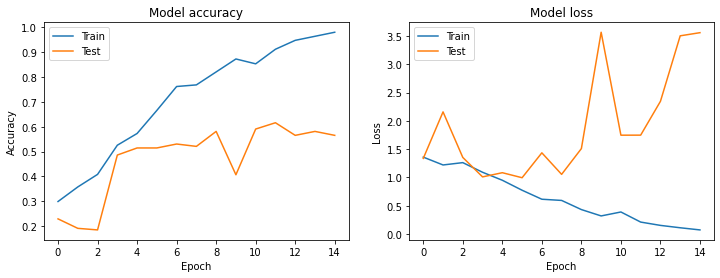

In [25]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),history.history['accuracy'])
plt.plot(range(EPOCHS),history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),history.history['loss'])
plt.plot(range(EPOCHS),history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


## Steps to do in Task 4

To potentially improve these metrics, you could:

1.Increase Training Epochs: Train the model for more epochs to see if the performance improves.

2.Hyperparameter Tuning: Experiment with different learning rates, batch sizes, and other hyperparameters.
3.Data Augmentation: Apply more data augmentation techniques to help the model generalize better.
4.Model Architecture: Experiment with deeper or different model architectures.
5.Regularization Techniques: Apply regularization techniques like dropout to prevent overfitting.

6. Play around with the dataset, devrease the number of images in the validation set and increase the training dataset, play aound with ratios


## Additional Contet for final presentation

first image to predict
actual label: Type 1


2024-06-17 13:36:12.332076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


predicted label: Type 1


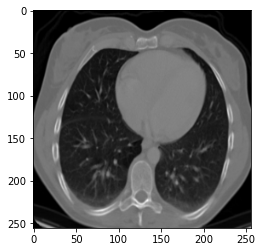

In [26]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

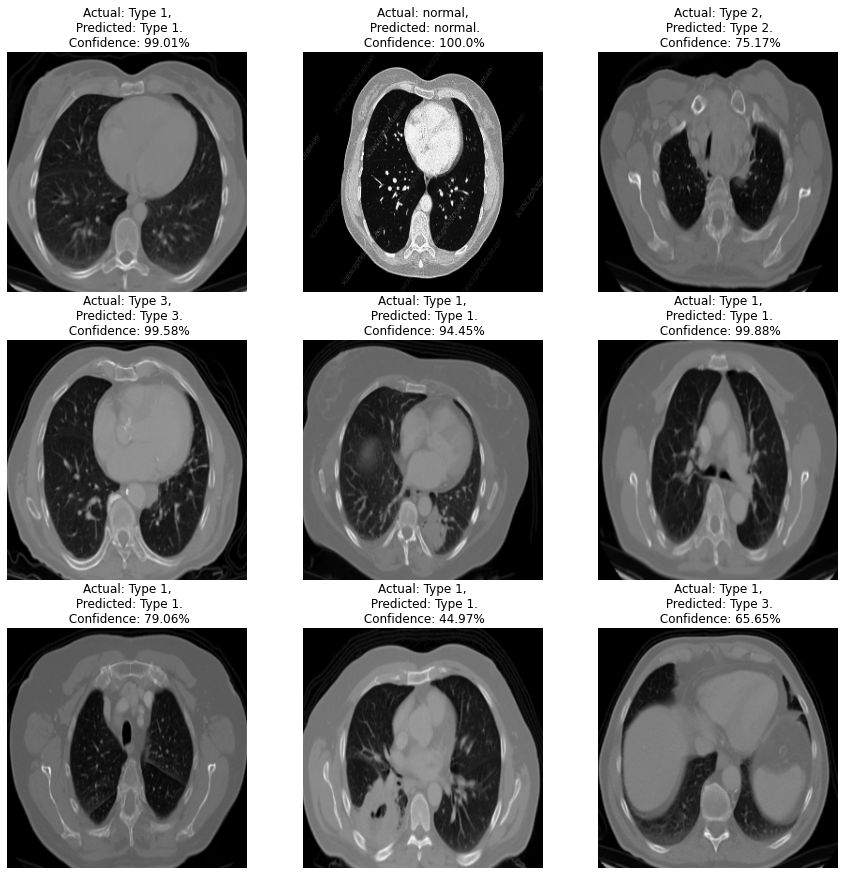

In [29]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    batch_size = images.shape[0]  # Get the actual batch size
    for i in range(min(9, batch_size)):  # Ensure we don't exceed the batch size
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

plt.show()
